In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
df = pd.DataFrame(data={'x': x, 'y':y})
df

,x,y
0,0.345584,0.039887
1,0.821618,2.505681
2,0.330437,0.535282
3,-1.303157,-1.937161
4,0.905356,3.029555
...,...,...
95,-2.250854,-6.119176
96,-0.138655,0.832327
97,0.033000,0.234106
98,-1.425349,-2.302292


In [3]:
X = MS(['x'], intercept=False).fit_transform(df)
y = df['y']
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [4]:
X = MS(['y'], intercept=False).fit_transform(df)
y = df['x']
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


In [5]:
X = MS(['x']).fit_transform(df)
y = df['y']
model = sm.OLS(y, X);
results1 = model.fit();
summarize(results1)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [6]:
def draw_line(ax, b, k, *args, **kwargs):
    # add a line with slope k and intercept b to axis ax
    xlim = ax.get_xlim()
    ylim = [k * xlim[0] + b, k * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

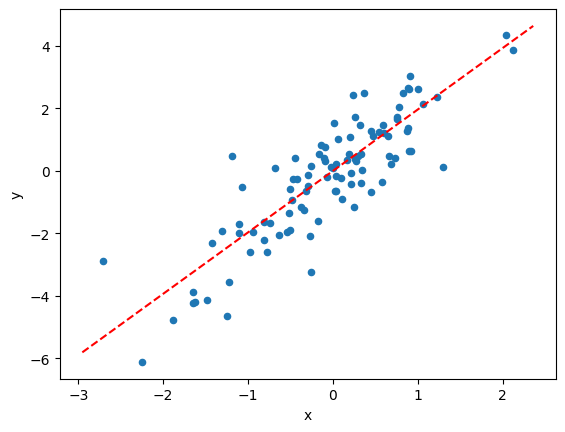

In [7]:
ax = df.plot('x', 'y', 'scatter')
draw_line(ax, 0, results1.params[1], 'r--')

In [13]:
results1.rsquared

0.7407603575807877

In [8]:
X = MS(['y']).fit_transform(df)
y = df['x']
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


The t-statistic for $H_0: \beta_1 = 0$ is the same for the regression of y onto x as of x onto y

In [9]:
X = MS(['x', poly('x', degree=2)]).fit_transform(df)
y = df['y']
model = sm.OLS(y, X);
results2 = model.fit();
summarize(results2)

,coef,std err,t,P>|t|
intercept,-0.0780,0.101,-0.772,0.442
x,1.9419,0.117,16.651,0.000
"poly(x, degree=2)[0]",0.2274,0.014,16.480,0.000
"poly(x, degree=2)[1]",-0.0522,1.007,-0.052,0.959


The P-value of intercept and coefficient of $x^2$ are very high, which means that they are zero.

In [10]:
def draw_curve(ax, a, b, *args, **kwargs):
    # add a quadratic curve ax^2 + bx to axis ax
    xlim = ax.get_xlim()
    xs = np.linspace(xlim[0], xlim[1], 100)
    ax.plot(xs, a * xs**2 + b*xs, *args, **kwargs)

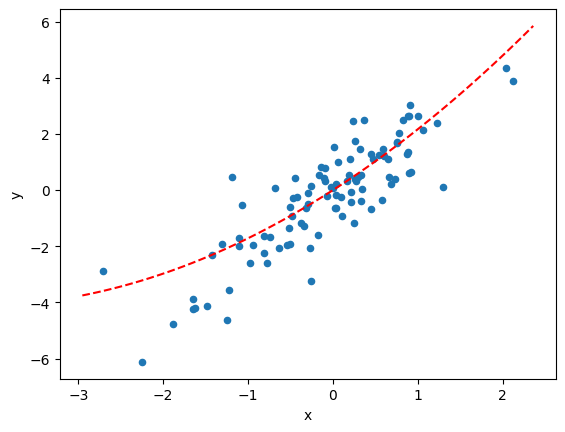

In [11]:
ax = df.plot('x', 'y', 'scatter')
draw_curve(ax, results2.params[2], results2.params[1], 'r--')

In [14]:
results2.rsquared

0.7407675414652726